# 14-1. breast cancer 실습

## 유방암 분류 문제 : 유방암 환자 분류하기

### 데이터 가져오기 및 살펴보기

#### load_breast_cancer를 import 해와서 breast_cancer 데이터를 로딩

In [3]:
from sklearn.datasets import load_breast_cancer
# sklearn 라이브러리의 datasets 패키지에서 load_breast_cancer 함수를 임포트함

cancer = load_breast_cancer()
# load_breast_cancer 함수는 breast_cancer 데이터셋을 로드하는 함수
# 로드된 breast_cancer 데이터셋을 cancer 변수에 저장

#### cancer에는 어떤 정보들이 담겼을지, keys() 라는 메서드로 확인

In [4]:
cancer.keys()
# wine 데이터셋에 담긴 정보 종류 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### 데이터는 cancer_data 변수에 저장한 후, 데이터의 크기를 확인

In [5]:
cancer_data = cancer.data
# keys에서 확인한 정보 중 data를 따로 iris_data 변수에 저장

print(cancer_data.shape) 
# shape는 배열의 형상정보를 출력

(569, 30)


### 분석 : 
569개의 데이터가 각각 30개의 정보를 담고 있음

#### 샘플로 하나의 데이터만 확인

In [6]:
cancer_data[0]
# 569개의 데이터 중 첫 번째 데이터 출력

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

#### 라벨(label) 또는 타겟(target) 확인 및 저장

In [7]:
cancer_label = cancer.target
# keys에서 확인한 정보 중 target을 따로 cancer_label 변수에 저장

print(cancer_label.shape)
cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### 분석:
길이와 형태를 확인하니 총 569개의 데이터가 들어있고, 각 값은 0, 1로 나타나는 것을 확인 가능

#### 라벨의 이름을 target_names에서 확인

In [8]:
cancer.target_names
# keys에서 확인한 정보 중 target_names를 변수에 따로 저장하지 않고 호출
# cancer_label이 가진 0,1의 이름 확인

array(['malignant', 'benign'], dtype='<U9')

### 분석:
'malignant', 'benign' 순서대로 담겨있음

이 순서 그대로 0이라면 malignant, 1이라면 benign를 나타냄

**malignant : 암O / benign : 암X

#### feature_names: 30개의 각 feature에 대한 설명

In [9]:
cancer.feature_names
# keys에서 확인한 정보 중 feature_names를 변수에 따로 저장하지 않고 호출
# cancer.data에서 확인한 30개 정보의 변수명 확인

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### 데이터셋을 DataFrame으로 변환

DataFrame 을 만들면서 data에는 cancer_data 넣어주고, 각 컬럼에는 feature_names로 이름을 붙여주기

In [23]:
import pandas as pd

cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### label(정답) 컬럼을 추가

In [24]:
cancer_df["label"] = cancer.target
# cancer_df에 label이라는 컬럼을 새로 추가
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### 결측치 확인

In [30]:
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

#### 학습에 사용하는 training dataset과 모델의 성능을 평가하는 데 사용하는 test dataset으로 데이터셋을 나누기

In [13]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=0)
# 나눠야 할 데이터(문제지, X): cancer_data
# 데이터의 라벨(정답, y): cancer_label
# cancer_data cancer_label 각각 train:test = 8:2의 비율로 잘라서 
# X_train, X_test, y_train, y_test에 저장


X_train.shape, y_train.shape, X_test.shape, y_test.shape
# train의 형상정보 확인 # test의 형상정보 확인

((455, 30), (455,), (114, 30), (114,))

### 머신러닝 모델 적용

## DecisionTree 

In [16]:
from sklearn.tree import DecisionTreeClassifier # 싸이킷런에 있는 결정트리분류기를 사용하기 위해 불러오는 코드
from sklearn.metrics import classification_report #싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드

decision_tree = DecisionTreeClassifier(random_state=1) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

decision_report = classification_report(y_test, y_pred) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.
print(decision_report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        47
           1       0.94      0.90      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



## RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

random_forest = RandomForestClassifier(random_state=2) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측


random_report = classification_report(y_test, y_pred)
print(random_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Support Vector Machine (SVM)

In [18]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() # 모델 객체를 만든다.

svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

svm_report = classification_report(y_test, y_pred)
print(svm_report) # 결과 지표를 확인


              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



## Stochastic Gradient Descent Classifier (SGDClassifier)

In [19]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

sgd_report = classification_report(y_test, y_pred)
print(sgd_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        47
           1       0.89      0.99      0.94        67

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression() # 모델 객체 생성

logistic_model.fit(X_train, y_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred = logistic_model.predict(X_test) # 예측

logistic_report = classification_report(y_test, y_pred)
print(logistic_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#### 다양한 모델들의 예측값의 결가지표 비교하기
print('< Decision Tree >')
print(decision_report)

print('< Random Forest >')
print(random_report)

print('< SVM >')
print(svm_report)

print('< SGD >')
print(sgd_report)

print('< Logistic Regression >')
print(logistic_report)

< Decision Tree >
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        47
           1       0.94      0.90      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

< Random Forest >
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

< SVM >
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0

### 분석:

실습의 목표는 유방암 환자를 분류하여 찾아내는 것이다. 따라서 'malignant'환자를 찾아야하기 때문에 label이 '0'값을 가진 데이터가 positive값이라고 할 수 있다. 

유방암 환자를 진단하는 경우, 실제 양성인데 음성이라고 오진을 하는 경우는 환자에게 치명적인 상황이 될 것이다. 따라서 오진이라도 현재 실습에서는 음성을 잡아내는 데에 실패하는 오진보다 양성을 잡아내는 데에 실패하는 오진의 치명도와 중요도가 훨씬 크다. 

현재 유방암 데이터의 예측결과는 다음과 같이 해석할 수 있다:

    TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)

    FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)

    FN(False Negative) : 암 환자에게 음성판정 (거짓 음성)

    TP(True Positive) : 암 환자에게 양성판정 (참 양성)
    
   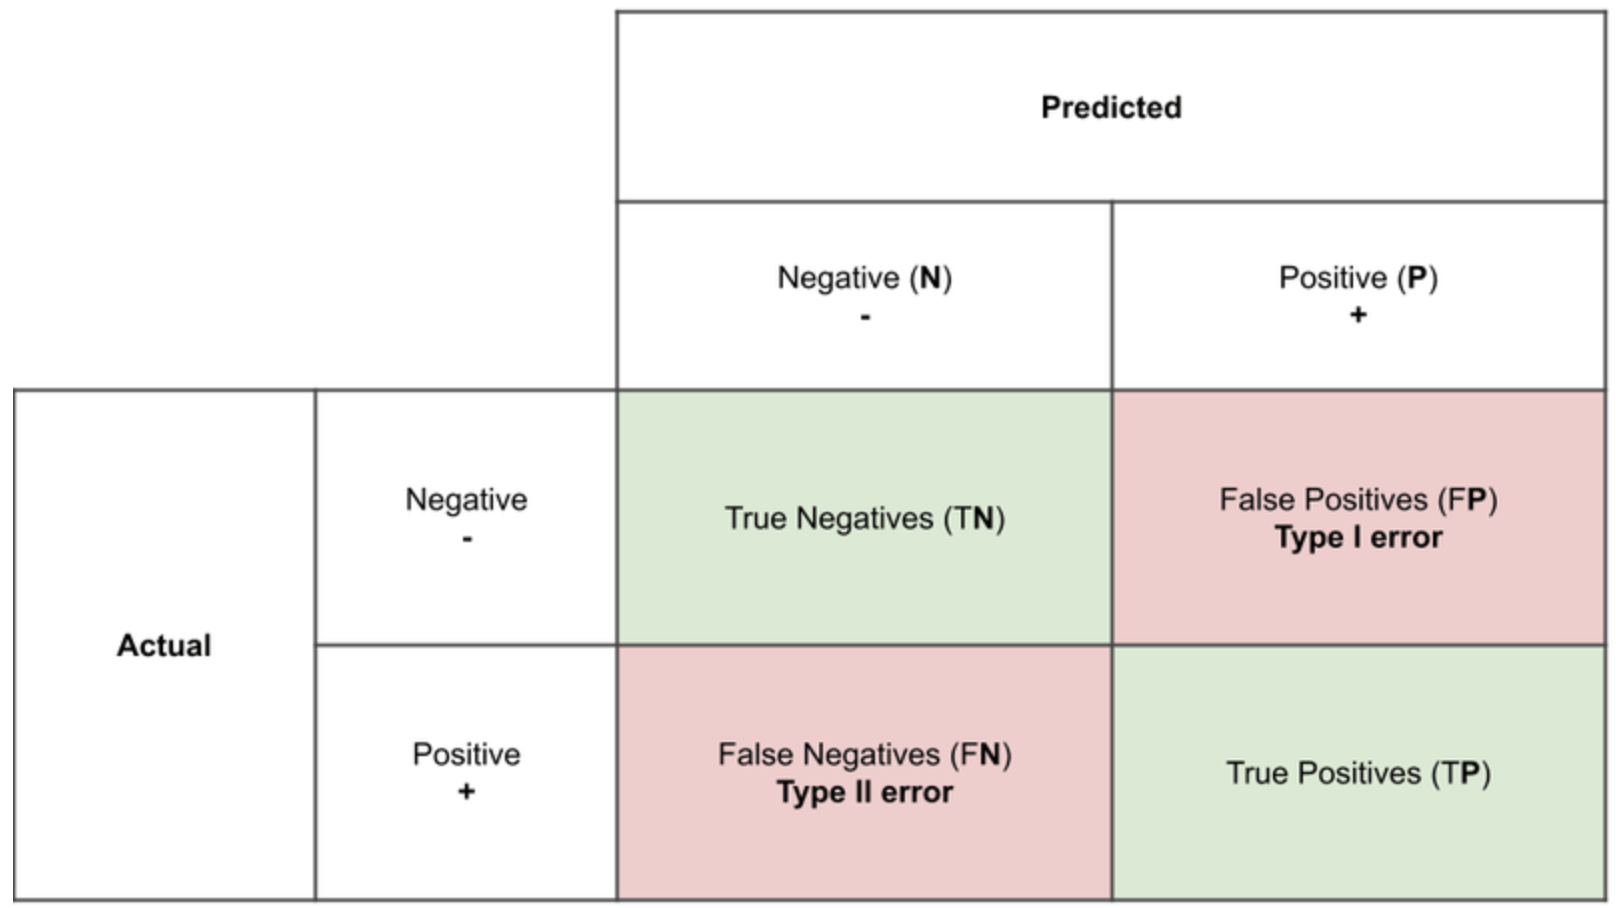


현재 실습에서는 양성인데 음성으로 판단하는 경우가 가장 치명적인 오류이고, 이 경우가 가장 적어야한다. 따라서 FN이 낮을수록 수치가 커지는 Recall 값이 가장 중요한 척도라고 할 수 있다.

   
   
위의 각 모델 예측 결과의 confusion matrix를 살펴보면,

    Decision Tree의 경우 recall 값이 0.91이고 f1-score는 0.89이다.

    Random Forest의 경우 recall 값이 0.96이고 f1-score는 0.97이다.

    SVM의 경우 recall 값이 0.85이고 f1-score는 0.91이다.

    SGD의 경우 recall 값이 0.83이고 f1-score는 0.90이다.

    Logistic Regression의 경우 recall 값이 0.98이고 f1-score는 0.94이다.

#### 즉, 정확도도 높으며 거짓 음성 판정의 확률도 가장 적은 Random Forest모델이 가장 적절한 예측 모델이라고 할 수 있다. 

#### Logistic Regression 모델은 recall값이 0.98로 가장 높다. 반면 precision 값이 낮아 f1-score가 Random Forest 모델보다 낮다.  따라서 만약 음성인데 양성으로 판단하는 오진이 많아도 상관이 전혀 없는 경우라면 Logistic Regession을 사용하는것이 가장 좋겠다.
